## Package Importing

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [32]:
crime_in = pd.read_csv('crimedata2.csv')
crime_in.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


## Data initial exploration

In [33]:
# find all "?" in the data set, set them to null and count the number of missing values
crime_in = crime_in.replace('?', np.nan)
crime_in.isnull().sum()

communityname             0
state                     0
countyCode             1221
communityCode          1224
fold                      0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 147, dtype: int64

In [34]:
crime_in.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,NaN,9988.79


/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_84325/2623122960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


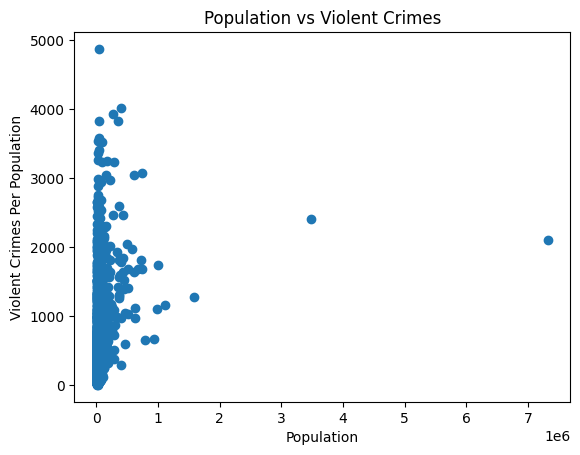

In [46]:
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


# Plot of Violent crime vs population scatter plot but with less data points
plt.scatter(crime_in_cleaned['population'], crime_in_cleaned['ViolentCrimesPerPop'])
# labels for the x axis 
plt.title('Population vs Violent Crimes')
plt.xlabel('Population')
plt.ylabel('Violent Crimes Per Population')
plt.show()

/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_84325/2298862505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


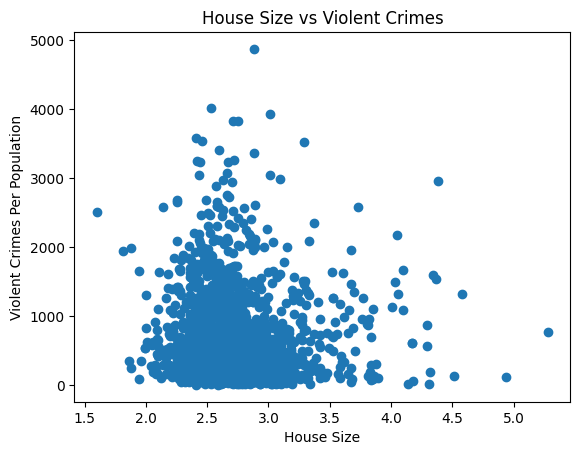

In [48]:
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))

plt.scatter(crime_in_cleaned['householdsize'], crime_in_cleaned['ViolentCrimesPerPop'])
# labels for the x axis 
plt.title('House Size vs Violent Crimes')
plt.xlabel('House Size')
plt.ylabel('Violent Crimes Per Population')
plt.show()

# violent crime vs 

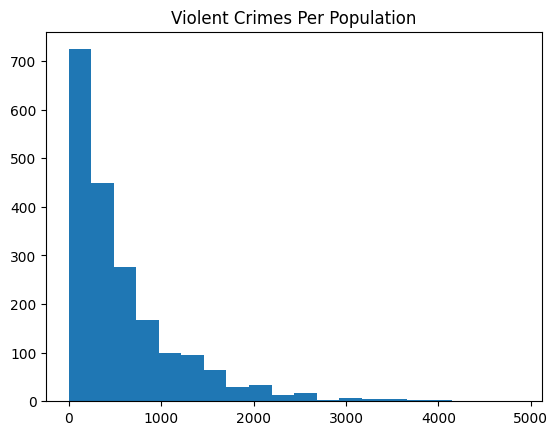

In [49]:
#distrobution of violent crime and nonviolent crime
#drop decimals in violent crimes per population
plt.hist(crime_in_cleaned['ViolentCrimesPerPop'], bins=20)
plt.title('Violent Crimes Per Population')
plt.show()

/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_84325/248785322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['nonViolPerPop'] = (crime_in_cleaned['nonViolPerPop'].astype(float))


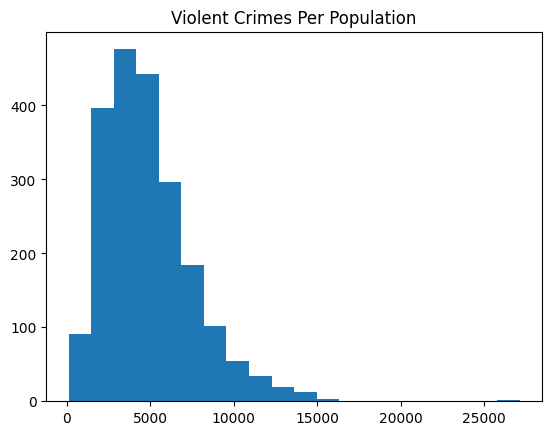

In [51]:
crime_in_cleaned = crime_in.dropna(subset=['nonViolPerPop'])
crime_in_cleaned['nonViolPerPop'] = (crime_in_cleaned['nonViolPerPop'].astype(float))

plt.hist(crime_in_cleaned['nonViolPerPop'], bins=20)
plt.title('Violent Crimes Per Population')
plt.show()